![](https://cbic.org.br/wp-content/uploads/2022/02/909fa5d1543363d809512626531cff03.jpeg)

# Introdução ao Pandas

Prof.: Nasser Santiago Boan
___

O Pandas é uma das principais bibliotecas utilizadas nos trabalhos de ciência de dados no dia-a-dia. Ele trabalha com dados de forma tabular e é bastante comparado ao excel. Suas duas principais estruturas de dados são a ```series``` e o ```dataframe (df)```, o primeiro é criado através de um array de uma dimensão e o segundo com arrays de duas dimensões.

O Pandas tem seus prós e contras, dentre seus prós temos a quantidade enorme de funções para criar, ler, salvar. transformar e tratar dados tabulares, tem uma sintaxe fácil e permite o encadeamento de métodos (method chaining). Dentre seus contras temos a ineficiência de memória para se trabalhar com grandes datasets (big data), porém existem outras bibliotecas parecidas com sintaxe parecida que trabalham com grandes quantidades de dados (Vaex e Dask).

Entender Pandas é totalmente necessário visto que é bem mais normal trabalharmos com massas de dados não tão grandes e todas as bibliotecas que trabalham com bigdata em python possuem uma classe chamada dataframe. A familiaridade com pandas é necessária para cientistas de dados iniciantes até para os mais sêniores.

## Importação
___

Para importar o pandas basta utilizar o código:

```python
import pandas as pd 
```

O alias ``pd`` é comumente utilizado e por convenção se mantém consistente ao longo de códigos escritos em python nas mais diversas formas.

In [1]:
## importando o pandas
import pandas as pd

## importando o numpy e definindo a seed aleatória
import numpy as np
np.random.seed(42)

## ignorando alguns warnings
import warnings
warnings.filterwarnings("ignore")

## barra de progresso
from tqdm import tqdm

## Dados
___

Para executar nosso trabalho iremos utilizar os datasets:

> ```crime_data_from_2020_to_present.csv```. A referência para o entendimento de cada colunas pode ser encontrado em [kaggle](https://www.kaggle.com/susant4learning/crime-in-los-angeles-data-from-2020-to-present). 

>```carros.csv``` que descreve as características de alguns carros juntamente com seus preços de venda (esse dataset foi adaptado de [kaggle](https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes)).

> ```titanic.csv``` que descreve cada um dos passageiros do Titanic e se sobreviveram ou não ao seu desastre. A referência com a descrição de cada coluna pode ser encontrada em [kaggle](https://www.kaggle.com/c/titanic/data).


> ```googleplaystore_user_reviews.csv``` contendo as avaliações e resultados da análise de sentimento de 1074 aplicativos diferentes da loja de aplicativos da google. [kaggle](https://www.kaggle.com/lava18/google-play-store-apps?select=googleplaystore_user_reviews.csv).

> ```gasolina_<ano>.csv``` contendo a quantidade em litros de gasolina vendida para cada munícipio do Brasil entre os de 2000 e 20018. [portal dados abertos](https://dados.gov.br/dataset/a-vendas-anuais-de-etanol-hidratado-e-derivados-de-petroleo-por-municipio-gasolina-c).

## Series
___

Series são conjuntos de dados de uma dimensão criados a partir de arrays (também de uma dimensão), são a base do pandas e possuem 4 características básicas:

* dados (data)
* indíces (index)
* tipo do dado (dtype)
* nome (name)

As várias funções e métodos do pandas podem ser utilizados em séries, dataframes ou em ambos, basta consultar a [documentação de referência](https://pandas.pydata.org/docs/reference/index.html#api) para entender.

Para criar uma série basta utilizar a função:

```python 
pd.Series(data,index,dtype,name)
```

In [2]:
## criando um array

arr = np.random.randint(50,100,size=24)
arr

array([88, 78, 64, 92, 57, 70, 88, 68, 72, 60, 60, 73, 85, 89, 73, 52, 71,
       51, 73, 93, 79, 87, 51, 70])

In [3]:
## criando uma série

pesos =  pd.Series(data=arr, index=range(0,24), dtype=int, name='pesos')
pesos

0     88
1     78
2     64
3     92
4     57
5     70
6     88
7     68
8     72
9     60
10    60
11    73
12    85
13    89
14    73
15    52
16    71
17    51
18    73
19    93
20    79
21    87
22    51
23    70
Name: pesos, dtype: int64

É possível acessar cada uma das características de uma série através dos métodos com seus respectivos nomes.

In [4]:
## acessando os dados da série

pesos.values

array([88, 78, 64, 92, 57, 70, 88, 68, 72, 60, 60, 73, 85, 89, 73, 52, 71,
       51, 73, 93, 79, 87, 51, 70])

In [5]:
## acessando os indices da série

pesos.index

RangeIndex(start=0, stop=24, step=1)

In [6]:
## acessando o tipo dos dados da série

pesos.dtype

dtype('int64')

In [7]:
## acessando o nome da série

pesos.name

'pesos'

# Operações com Séries
___

As operações com séries funcionam da mesma forma das operações com arrays. Toda a comodidade dos arrays é replicada para séries.

In [8]:
## criando um array dos alturas e sua respectiva série

arr_alturas = np.random.randint(50,70,size=24)
alturas = pd.Series(arr_alturas,name='height*10(foot)')
alturas

0     50
1     61
2     61
3     66
4     59
5     65
6     64
7     64
8     68
9     61
10    69
11    52
12    54
13    68
14    56
15    58
16    56
17    67
18    53
19    63
20    67
21    58
22    51
23    69
Name: height*10(foot), dtype: int64

In [9]:
## transformando a altura de foot para cm

alturas = (alturas/10)*30.48
alturas.name = 'altura(cm)'
alturas

0     152.400
1     185.928
2     185.928
3     201.168
4     179.832
5     198.120
6     195.072
7     195.072
8     207.264
9     185.928
10    210.312
11    158.496
12    164.592
13    207.264
14    170.688
15    176.784
16    170.688
17    204.216
18    161.544
19    192.024
20    204.216
21    176.784
22    155.448
23    210.312
Name: altura(cm), dtype: float64

Para executar operações entre duas séries é necessário que ambas possuam o mesmo shape. Nos casos de operações entre séries com shapes diferentes é criado um valor nulo no local.

In [10]:
## criando a série com a correção das alturas

correcao_altura = pd.Series(np.random.normal(size=12),name='correcao_altura(cm)')
correcao_altura

0     0.779193
1    -1.101098
2     1.130228
3     0.373119
4    -0.386473
5    -1.158770
6     0.566113
7    -0.704453
8    -1.377939
9    -0.353117
10   -0.461466
11    0.066657
Name: correcao_altura(cm), dtype: float64

In [11]:
alturas + correcao_altura

0     153.179193
1     184.826902
2     187.058228
3     201.541119
4     179.445527
5     196.961230
6     195.638113
7     194.367547
8     205.886061
9     185.574883
10    209.850534
11    158.562657
12           NaN
13           NaN
14           NaN
15           NaN
16           NaN
17           NaN
18           NaN
19           NaN
20           NaN
21           NaN
22           NaN
23           NaN
dtype: float64

Caso exista necessidade de adicionar valores a uma série, podemos utilizar o método:

```python
.append()
```

Vale notar que o método acima só aceita outra série e não arrays ou listas.

In [12]:
## criando a série para append
serie_para_append = pd.Series(np.array([0 for _ in range(12)]))
serie_para_append

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
dtype: int64

In [13]:
## dando append na série correcao_altura ignorando os índices
correcao_altura = correcao_altura.append(serie_para_append,ignore_index=True)
correcao_altura

0     0.779193
1    -1.101098
2     1.130228
3     0.373119
4    -0.386473
5    -1.158770
6     0.566113
7    -0.704453
8    -1.377939
9    -0.353117
10   -0.461466
11    0.066657
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23    0.000000
dtype: float64

In [14]:
## corrigindo alturas

alturas = alturas + correcao_altura
alturas

0     153.179193
1     184.826902
2     187.058228
3     201.541119
4     179.445527
5     196.961230
6     195.638113
7     194.367547
8     205.886061
9     185.574883
10    209.850534
11    158.562657
12    164.592000
13    207.264000
14    170.688000
15    176.784000
16    170.688000
17    204.216000
18    161.544000
19    192.024000
20    204.216000
21    176.784000
22    155.448000
23    210.312000
dtype: float64

Também é possível executar operações lógicas com séries e o retorno são também series de valores booleanos.

In [15]:
alturas > 190

0     False
1     False
2     False
3      True
4     False
5      True
6      True
7      True
8      True
9     False
10     True
11    False
12    False
13     True
14    False
15    False
16    False
17     True
18    False
19     True
20     True
21    False
22    False
23     True
dtype: bool

In [16]:
## utilizando condições lógicas mais complexas

alturas > 190 and alturas < 200

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

As condições lógicas mais complexas utilizando ```not and or``` no pandas são representadas por outros operadores, respectivamente ```~ & \```.

In [17]:
## utilizando and &

(alturas > 190) & (alturas < 200)

0     False
1     False
2     False
3     False
4     False
5      True
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19     True
20    False
21    False
22    False
23    False
dtype: bool

In [18]:
~( (alturas > 190) & (alturas < 200) )

0      True
1      True
2      True
3      True
4      True
5     False
6     False
7     False
8      True
9      True
10     True
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19    False
20     True
21     True
22     True
23     True
dtype: bool

In [19]:
alturas[(alturas > 190) & (alturas < 200)]

5     196.961230
6     195.638113
7     194.367547
19    192.024000
dtype: float64

In [20]:
serie_index_str = pd.Series(np.array([10,12,15]),index=['valorA','valorB','valorC'])

In [21]:
serie_index_str['valorC'] == serie_index_str[-1] == serie_index_str[2]

True

## DataFrame
___

O dataframe nada mais é do que um conjunto de series organizadas como colunas. Ele possui a maior gama de métodos e funções, possui características e pode ser indexado facilmente. Ele é a principal estrutura de dados utilizada no pandas e torna o trabalho de manipulação de dados muito mais simples. Para criar um dataframe basta utilizar um array de duas dimensões através do código:

```python
pd.DataFrame(data,index,columns,dtype)
```

Diferente da criação das séries, ao invés de nome o dataframe tem ```columns``` que é uma lista com os nomes de cada coluna.

In [22]:
## criando um array de duas dimensões utilizando os já criados

arr_2d = np.column_stack([alturas,pesos])
arr_2d

array([[153.17919263,  88.        ],
       [184.82690224,  78.        ],
       [187.05822819,  64.        ],
       [201.54111891,  92.        ],
       [179.44552705,  57.        ],
       [196.96122976,  70.        ],
       [195.63811283,  88.        ],
       [194.36754655,  68.        ],
       [205.8860607 ,  72.        ],
       [185.57488335,  60.        ],
       [209.85053428,  60.        ],
       [158.56265728,  73.        ],
       [164.592     ,  85.        ],
       [207.264     ,  89.        ],
       [170.688     ,  73.        ],
       [176.784     ,  52.        ],
       [170.688     ,  71.        ],
       [204.216     ,  51.        ],
       [161.544     ,  73.        ],
       [192.024     ,  93.        ],
       [204.216     ,  79.        ],
       [176.784     ,  87.        ],
       [155.448     ,  51.        ],
       [210.312     ,  70.        ]])

In [23]:
## criando um dataframe

df = pd.DataFrame(data=arr_2d, columns=['ALTURAS DOS JOGADORES','PESOS DOS JOGADORES'])
df

,ALTURAS DOS JOGADORES,PESOS DOS JOGADORES
0,153.179193,88.0
1,184.826902,78.0
2,187.058228,64.0
3,201.541119,92.0
4,179.445527,57.0
5,196.961230,70.0
6,195.638113,88.0
7,194.367547,68.0
8,205.886061,72.0
9,185.574883,60.0


O dataframe possui uma série de características que podem ser acessadas e algumas até alteradas.

In [24]:
## shape

df.shape

(24, 2)

O shape do dataframe é igual ao do array que o criou, caso o dataframe seja alterado o shape também é alterado.

In [25]:
## size

df.size

48

In [26]:
## columns

df.columns

Index(['ALTURAS DOS JOGADORES', 'PESOS DOS JOGADORES'], dtype='object')

É possível alterar os nomes das colunas sobreescrevendo os valores associados a ```df.columns```

In [27]:
## alterando o nome das colunas de forma rápida

df.columns = [x.lower().replace(' ','_') for x in df.columns]
df.columns

Index(['alturas_dos_jogadores', 'pesos_dos_jogadores'], dtype='object')

In [28]:
df

,alturas_dos_jogadores,pesos_dos_jogadores
0,153.179193,88.0
1,184.826902,78.0
2,187.058228,64.0
3,201.541119,92.0
4,179.445527,57.0
5,196.961230,70.0
6,195.638113,88.0
7,194.367547,68.0
8,205.886061,72.0
9,185.574883,60.0


In [29]:
## indíces

df.index

RangeIndex(start=0, stop=24, step=1)

In [30]:
## eixos

df.axes

[RangeIndex(start=0, stop=24, step=1),
 Index(['alturas_dos_jogadores', 'pesos_dos_jogadores'], dtype='object')]

Vale a pena notar que em várias funções do pandas existe o parâmetro ```axis``` podendo receber os valores 0 ou 1.

![axis](imagens/axis.png)

O racional é que no eixo 0 efetuamos uma operação **por toda a exntesão das linhas** e no eixo 1 efetuamos a operação **por toda a exntesão das colunas**.

Para conseguir informações rápidas sobre o dataframe, podemos utilizara a função ```df.info()``` que mostra:

* a classe do objeto em ```df```
* informações sobre o índice
* quantidade de colunas
* tipos dos dados de cada coluna
* quantidade de valores não nulos em cada coluna
* uso de memória para guardar o dataframe

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   alturas_dos_jogadores  24 non-null     float64
 1   pesos_dos_jogadores    24 non-null     float64
dtypes: float64(2)
memory usage: 512.0 bytes


Dataframes também podem ser criados através de dicionários através da função:

```python
pd.DataFrame.from_dict(data,orient,dtype,columns)
```

O parâmetro ```orient``` vai controlar o funcionamento da função e resultará em resultados diferentes.

In [32]:
data = {
    'col_1': [3, 2, 1, 0], 
    'col_2': ['a', 'b', 'c', 'd']
}

In [33]:
## utilizando a orientação por colunas

pd.DataFrame.from_dict(data,orient='columns')

,col_1,col_2
0,3,a
1,2,b
2,1,c
3,0,d


In [34]:
## utilizando a orientação por indices

pd.DataFrame.from_dict(data,orient='index')

,0,1,2,3
col_1,3,2,1,0
col_2,a,b,c,d


Perceba que ```orient``` controla a interpretação das chaves do dicionário e sua transformação em linhas (index) ou colunas (columns).

## Input e Output
___

O pandas oferece várias funções ler dados de vários formatos e escrever também em vários formatos. O formato mais comum de dados que utilizamos são os ```csv``` e o ```xlsx```, mas o pandas está preparado também para ler arquivos com os seguintes formatos:

* texto (extensão .txt)
* .json
* html
* XML
* área de transferência
* HDF5
* .parquet
* stata
* sas
* spss

Para a leitura de arquivos basta utilizarmos o sintaxe ```read_<tipo do arquivo>``` da seguinte forma:

```python
pd.read_csv()
pd.read_excel()
pd.read_json()
pd.read_xml()
pd.read_hdf()
pd.read_html()
```

Para a escrita de arquivos basta utilizarmos o sintaxe ```to_<tipo do arquivo>``` da seguinte forma:

```python
df.to_csv()
df.to_excel()
df.to_json()
df.to_xml()
df.to_hdf()
df.to_html()
```

In [37]:
## abrindo arquivo csv

pd.read_csv('dados/infracoes_ago_2022.csv',sep=';').head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


A função

```python
pd.read_csv()
```

possui vários parâmetros, em sua grande maioria são opcionais, mas são extremamente úteis para nosso trabalho. Alguns dos mais utilizados:

* encoding -> define o encoding dos dados de entrada
* sep -> define o separador entre os dados
* usecols -> recebe uma lista com o nome das colunas que devem ser carregadas
* nrows -> define a quantidade de linhas a serem carregadas
* decimal -> define o caracter utilizado para separação de decimais
* converters -> recebe um dicionário contendo o nome das colunas e os tipos para conversão

A utilização dos parâmetros de leitura de arquivos vai sempre variar de acordo com a necessidade de leitura. Em casos de dados muito grandes, podemos utilizar ```nrows``` para trabalhar inicialmente com uma pequena amostra dos dados e depois executar o código com o dataset completo, por exemplo.

In [40]:
## usando o nrows

pd.read_csv('dados/infracoes_ago_2022.csv',sep=';',nrows=100)

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,01:22,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
96,5185-2,Deixar o passageiro de usar o cinto segurança,Condutor,Automóvel,01/08/2022,01:23,DF 001,19.0,Sentido Decrescente,posto policial,-15.623783,-47.83639,Grave
97,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,01:25,"DF-075 (EPNB) KM 2,4 SENT. N. BAND / EPIA (DF-...",NaN,NaN,NaN,NaN,NaN,Média
98,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,01:26,"DF-085(EPTG) KM 4,5 SENTIDO DF-003(EPIA) VIA M...",NaN,NaN,NaN,NaN,NaN,Média


Também podemos usar o ```usecols``` para ler somente as colunas que queremos (e em conjunto com ```nrows```) e diminuir o consumo de memória.

In [47]:
## utilizando nrows e usecols

small_df =  pd.read_csv('dados/infracoes_ago_2022.csv',
                        sep=';',
                        nrows=1000,
                        usecols=['tipo_infracao','tipo_veiculo','cometimento','grav_tipo'])

small_df

,tipo_infracao,tipo_veiculo,cometimento,grav_tipo
0,7455-0,AUTOMOVEL,01/08/2022,Média
1,5681-0,CAMIONETA,01/08/2022,Leve
2,5681-0,AUTOMOVEL,01/08/2022,Leve
3,7455-0,AUTOMOVEL,01/08/2022,Média
4,5681-0,AUTOMOVEL,01/08/2022,Leve
...,...,...,...,...
995,5681-0,CAMIONETA,01/08/2022,Leve
996,5118-0,Automóvel,01/08/2022,Gravíssima
997,7455-0,UTILITARIO,01/08/2022,Média
998,5010-0,Automóvel,01/08/2022,Gravíssima


# Indexing e Slicing
___

Já vimos anteriormente que todo dataframe possui algumas características (ou partes) que são importante. Um array de valores (dados), um conjunto de índices para as linhas e também um conjunto de índices para as colunas. Para acessarmos e modificarmos valores nos dataframes é necessário entendermos os conceitos por trás desses índices.

In [48]:
df = pd.read_csv('dados/infracoes_ago_2022.csv', sep=';')
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


Já vimos que é possível acessar os nomes dos índices e das colunas através dos códigos

```python
df.columns
df.index
```

In [49]:
## nomes das colunas

df.columns

Index(['tipo_infracao', 'descricao', 'tipo_infrator', 'tipo_veiculo',
       'cometimento', 'hora_cometimento', 'auinf_local_rodovia',
       'auinf_local_km', 'auinf_local_referencia', 'auinf_local_complemento',
       'auinf_local_latitude', 'auinf_local_longitude', 'grav_tipo'],
      dtype='object')

In [50]:
## indices das linhas

df.index

RangeIndex(start=0, stop=83125, step=1)

Podemos modificar os índices das linhas utilizando os valores de uma coluna inteira como novos índices. Para isso basta utilizar a função 

```python
df.set_index('nome da coluna')
```

In [51]:
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


In [53]:
## novo índice

df = df.set_index('tipo_infracao')
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


Podemos também resetar os índices, voltando a ter índices das linhas dentro de um range incremetal. Para isso basta utilizarmos o 

```python
df.reset_index()
```

In [54]:
df = df.reset_index()
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


Ao selecionar linhas ou colunas utilizamos seus índices, sejam eles números ou strings. Para selecionar colunas inteiras é basta utilizarmos a seguinte sintaxe

```python
df['nome da coluna']
```

In [56]:
## acessando todos os valores de uma colunas (selecionando a coluna)

df['cometimento']

0        01/08/2022
1        01/08/2022
2        01/08/2022
3        01/08/2022
4        01/08/2022
            ...    
83120    31/08/2022
83121    31/08/2022
83122    31/08/2022
83123    31/08/2022
83124    31/08/2022
Name: cometimento, Length: 83125, dtype: object

Veja que ao acessar a coluna, estamos na verdade retornando uma série. Ela possui todas as características e métodos de uma série comum.

In [57]:
## verificando o tipo

type(df['cometimento'])

pandas.core.series.Series

Ainda é possível utilizar outra sintaxe para acessar uma coluna!

In [58]:
## acessando a mesma coluna cometimento

df.cometimento

0        01/08/2022
1        01/08/2022
2        01/08/2022
3        01/08/2022
4        01/08/2022
            ...    
83120    31/08/2022
83121    31/08/2022
83122    31/08/2022
83123    31/08/2022
83124    31/08/2022
Name: cometimento, Length: 83125, dtype: object

É possível também retornar um grupo de colunas através do indexador ```[]``` basta que ele receba, ao invés de um único nome da coluna, uma lista de nomes.

In [59]:
ls_colunas = ['cometimento','grav_tipo']
df[ls_colunas]

,cometimento,grav_tipo
0,01/08/2022,Média
1,01/08/2022,Leve
2,01/08/2022,Leve
3,01/08/2022,Média
4,01/08/2022,Leve
...,...,...
83120,31/08/2022,Grave
83121,31/08/2022,Grave
83122,31/08/2022,Gravíssima
83123,31/08/2022,Grave


Perceba que retorno da nossa indexação é um conjunto de séries formando um novo dataframe contendo somente aquilo que selecionamos. Essa sintaxe é bem simples para o acesso de informações guardadas em colunas, mas e para acessar somente linhas, para isso utilizamos os métodos ```.loc[]``` e ```.iloc[]```.

In [60]:
df.head()

,tipo_infracao,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
0,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
1,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
2,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
3,7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
4,5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


In [61]:
## acessando a linha com o indice zero

df.loc[0]

tipo_infracao                                                         7455-0
descricao                  Transitar em velocidade superior à máxima perm...
tipo_infrator                                                       Condutor
tipo_veiculo                                       AUTOMOVEL                
cometimento                                                       01/08/2022
hora_cometimento                                                       00:02
auinf_local_rodovia        DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...
auinf_local_km                                                           NaN
auinf_local_referencia                                                   NaN
auinf_local_complemento                                                  NaN
auinf_local_latitude                                                     NaN
auinf_local_longitude                                                    NaN
grav_tipo                                                              Média

In [62]:
df = df.set_index('tipo_infracao')
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


In [63]:
df.loc[0]

KeyError: 0

Ao alterarmos o índice de 0 para o valor na colunas 'tipo_infracao' não conseguimos mais acessar a linha utilizando o índice 0, mas sim o índice '5681-0'

In [64]:
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


In [65]:
df.loc['5681-0']

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Caminhonete,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,-15.877703,-48.007785,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,31/08/2022,18:33,DF 075,7,Sentido Crescente,NaN,0.000000,0.000000,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,0.000000,0.000000,Leve


É importante notar que a sintaxe ```.loc[]``` utiliza o identificador do índice, seja ele uma string ou um número. Se passarmos um índice que não existe para ```.loc[]``` teremos um erro de chaveamento.

É possível não utilizar o índice, mas a localização da linha de fato. Nesse sentido, ao invés de passarmos o nome do índice, passamos a localização do índice que queremos retornar. Para isso basta usar a sintaxe ```.iloc[]```

In [68]:
df.loc['5681-0']

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,01/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
...,...,...,...,...,...,...,...,...,...,...,...,...
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Caminhonete,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,-15.877703,-48.007785,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,31/08/2022,18:33,DF 075,7,Sentido Crescente,NaN,0.000000,0.000000,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,Automóvel,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,0.000000,0.000000,Leve


In [72]:
df.iloc[0]

descricao                  Transitar em velocidade superior à máxima perm...
tipo_infrator                                                       Condutor
tipo_veiculo                                       AUTOMOVEL                
cometimento                                                       01/08/2022
hora_cometimento                                                       00:02
auinf_local_rodovia        DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...
auinf_local_km                                                           NaN
auinf_local_referencia                                                   NaN
auinf_local_complemento                                                  NaN
auinf_local_latitude                                                     NaN
auinf_local_longitude                                                    NaN
grav_tipo                                                              Média
Name: 7455-0, dtype: object

Tanto o ```.loc[]``` quanto o ```.iloc[]``` suportam a também uma indexação mais completa passando também o identificador ou o número do índice da colunas.

In [73]:
## acessando o valor de cometimento da linhas com índice 5681-0

df.loc['5681-0','cometimento']

tipo_infracao
5681-0    01/08/2022
5681-0    01/08/2022
5681-0    01/08/2022
5681-0    01/08/2022
5681-0    01/08/2022
             ...    
5681-0    31/08/2022
5681-0    31/08/2022
5681-0    31/08/2022
5681-0    31/08/2022
5681-0    31/08/2022
Name: cometimento, Length: 24266, dtype: object

In [76]:
## acessando o valor de cometimento da linhas com índice 5681-0 utilizando iloc

df.iloc[1,3]

'01/08/2022'

Se podemos acessar o valor, também podemos alterá-lo.

In [78]:
df.iloc[1,3] = '02/08/2022'
df.iloc[1,3]

'02/08/2022'

In [79]:
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,02/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,01/08/2022,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve


Tanto o ```.loc``` quanto o ```.iloc``` também trabalham com fatiamento através do ```:```

In [80]:
## usando iloc com fatiamento

df.iloc[:10,:3]

,descricao,tipo_infrator,tipo_veiculo
tipo_infracao,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,UTILITARIO
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL


In [83]:
## usando o loc com fatiamento

df.loc['5681-0','cometimento':'grav_tipo']

,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo
tipo_infracao,,,,,,,,,
5681-0,02/08/2022,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,01/08/2022,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,01/08/2022,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve
5681-0,01/08/2022,00:07,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve
...,...,...,...,...,...,...,...,...,...
5681-0,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,-15.877703,-48.007785,Leve
5681-0,31/08/2022,18:33,DF 075,7,Sentido Crescente,NaN,0.000000,0.000000,Leve
5681-0,31/08/2022,18:33,DF 075,07,Sentido Crescente,NaN,0.000000,0.000000,Leve


In [85]:
## usando o loc com listas

df.loc['5681-0',['cometimento','grav_tipo']]

,cometimento,grav_tipo
tipo_infracao,,
5681-0,02/08/2022,Leve
5681-0,01/08/2022,Leve
5681-0,01/08/2022,Leve
5681-0,01/08/2022,Leve
5681-0,01/08/2022,Leve
...,...,...
5681-0,31/08/2022,Leve
5681-0,31/08/2022,Leve
5681-0,31/08/2022,Leve


In [86]:
df.iloc[[10,13],[3,6]]

,cometimento,auinf_local_km
tipo_infracao,,
5681-0,01/08/2022,NaN
7455-0,01/08/2022,NaN


Da mesma forma que podemos fazer indexação de listas e arrays utilizando máscaras de valores booleanos também conseguimos fazer isso com dataframes.

Se quisermos utilizar condições lógicas mais complicadas é possível, basta criar condições lógicas mais complexas também.

# Datas
___

Além dos tipos tradicionais de dados do python ainda temos o ```datetime``` que é um tipo de dados específico para trabalhar com datas e horas. Esse tipo de dado é bastante utilizado para criar novas colunas e extrair mais informações sobre os dados, finalmente também é possível fazer várias operações com datas que ajudam a nossa análise.

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83125 entries, 7455-0 to 6769-0
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   descricao                83125 non-null  object 
 1   tipo_infrator            83125 non-null  object 
 2   tipo_veiculo             83125 non-null  object 
 3   cometimento              83125 non-null  object 
 4   hora_cometimento         83125 non-null  object 
 5   auinf_local_rodovia      83112 non-null  object 
 6   auinf_local_km           26301 non-null  object 
 7   auinf_local_referencia   25360 non-null  object 
 8   auinf_local_complemento  1967 non-null   object 
 9   auinf_local_latitude     26132 non-null  float64
 10  auinf_local_longitude    26132 non-null  float64
 11  grav_tipo                83125 non-null  object 
dtypes: float64(2), object(10)
memory usage: 10.3+ MB


A coluna ```DATE OCC``` está como objeto, o correto seria transformá-la em ```datetime``` para isso podemos utilizar a função 

```python
pd.to_datetime()
```

In [92]:
df['DATE OCC'] = pd.to_datetime(df['cometimento'])

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83125 entries, 7455-0 to 6769-0
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   descricao                83125 non-null  object        
 1   tipo_infrator            83125 non-null  object        
 2   tipo_veiculo             83125 non-null  object        
 3   cometimento              83125 non-null  datetime64[ns]
 4   hora_cometimento         83125 non-null  object        
 5   auinf_local_rodovia      83112 non-null  object        
 6   auinf_local_km           26301 non-null  object        
 7   auinf_local_referencia   25360 non-null  object        
 8   auinf_local_complemento  1967 non-null   object        
 9   auinf_local_latitude     26132 non-null  float64       
 10  auinf_local_longitude    26132 non-null  float64       
 11  grav_tipo                83125 non-null  object        
 12  DATE OCC                 83125 

O ```datetime``` possui métodos para que possamos extrair informações mais específicas de cada data. Para acessar esses métodos temos que selecionar a coluna com o datetime e utilizar o método ```.dt```.

In [94]:
## extraindo o ano de cada data

df['ano'] = df['DATE OCC'].dt.year
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano
tipo_infracao,,,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,2022-02-08,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-02-08,2022
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022


In [95]:
## extraindo o mês de cada data

df['mes'] = df['DATE OCC'].dt.month
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano,mes
tipo_infracao,,,,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,2022-02-08,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-02-08,2022,2
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1


In [96]:
## extraindo o número da semana

df['semana_do_ano'] = df['DATE OCC'].dt.isocalendar().week
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano,mes,semana_do_ano
tipo_infracao,,,,,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,2022-02-08,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-02-08,2022,2,6
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1


In [97]:
## extraindo o dia do mês

df['dia_do_mes'] = df['DATE OCC'].dt.day
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano,mes,semana_do_ano,dia_do_mes
tipo_infracao,,,,,,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1,8
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,2022-02-08,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-02-08,2022,2,6,8
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1,8
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1,8
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1,8


In [98]:
## extraindo o dia da semana (segunda == 0 até domingo == 6)

df['dia_da_semana'] = df['DATE OCC'].dt.dayofweek
df.head()

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano,mes,semana_do_ano,dia_do_mes,dia_da_semana
tipo_infracao,,,,,,,,,,,,,,,,,,
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:02,"DF-007(EPTT) VIA MARGINAL KM 0,5 SENTIDO DF-00...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1,8,5
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMIONETA,2022-02-08,00:03,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-02-08,2022,2,6,8,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1,8,5
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-01-08,00:04,"DF-075 (EPNB) KM 0,5 SENTIDO SAMAMBAIA ...",NaN,NaN,NaN,NaN,NaN,Média,2022-01-08,2022,1,1,8,5
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-01-08,00:07,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-01-08,2022,1,1,8,5


Para executar operações com as datas temos que utilizar a função ```pd.DateOffset```. Essa função é capaz criar um objeto de data que pode ser facilmente utilizado em operações.

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83125 entries, 7455-0 to 6769-0
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   descricao                83125 non-null  object        
 1   tipo_infrator            83125 non-null  object        
 2   tipo_veiculo             83125 non-null  object        
 3   cometimento              83125 non-null  datetime64[ns]
 4   hora_cometimento         83125 non-null  object        
 5   auinf_local_rodovia      83112 non-null  object        
 6   auinf_local_km           26301 non-null  object        
 7   auinf_local_referencia   25360 non-null  object        
 8   auinf_local_complemento  1967 non-null   object        
 9   auinf_local_latitude     26132 non-null  float64       
 10  auinf_local_longitude    26132 non-null  float64       
 11  grav_tipo                83125 non-null  object        
 12  DATE OCC                 83125 

In [100]:
## adicionando um dia

df['DATE OCC'] + 1

TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [101]:
## adicionando um dia

df['DATE OCC'] + pd.DateOffset(days=1)

tipo_infracao
7455-0   2022-01-09
5681-0   2022-02-09
5681-0   2022-01-09
7455-0   2022-01-09
5681-0   2022-01-09
            ...    
6653-2   2022-09-01
6726-1   2022-09-01
5010-0   2022-09-01
6670-0   2022-09-01
6769-0   2022-09-01
Name: DATE OCC, Length: 83125, dtype: datetime64[ns]

In [102]:
## subtraindo um dia

df['DATE OCC'] + pd.DateOffset(days=-1)

tipo_infracao
7455-0   2022-01-07
5681-0   2022-02-07
5681-0   2022-01-07
7455-0   2022-01-07
5681-0   2022-01-07
            ...    
6653-2   2022-08-30
6726-1   2022-08-30
5010-0   2022-08-30
6670-0   2022-08-30
6769-0   2022-08-30
Name: DATE OCC, Length: 83125, dtype: datetime64[ns]

In [103]:
df['DATE OCC'] + pd.DateOffset(years=-1)

tipo_infracao
7455-0   2021-01-08
5681-0   2021-02-08
5681-0   2021-01-08
7455-0   2021-01-08
5681-0   2021-01-08
            ...    
6653-2   2021-08-31
6726-1   2021-08-31
5010-0   2021-08-31
6670-0   2021-08-31
6769-0   2021-08-31
Name: DATE OCC, Length: 83125, dtype: datetime64[ns]

As datas também aceitam serem alvos de operações lógicas! Através de strings, o que deixa as operações lógicas bem mais fáceis.

In [105]:
mascara = (df['DATE OCC'] >= '2022-03-01') & (df['DATE OCC'] <= '2022-03-31')
df[mascara]

,descricao,tipo_infrator,tipo_veiculo,cometimento,hora_cometimento,auinf_local_rodovia,auinf_local_km,auinf_local_referencia,auinf_local_complemento,auinf_local_latitude,auinf_local_longitude,grav_tipo,DATE OCC,ano,mes,semana_do_ano,dia_do_mes,dia_da_semana
tipo_infracao,,,,,,,,,,,,,,,,,,
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,S.REBOQUE,2022-03-08,00:00,"DF-075 (EPNB) KM 4,4 SENT. N. BAND. / RIACHO F...",NaN,NaN,NaN,NaN,NaN,Leve,2022-03-08,2022,3,10,8,1
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-03-08,00:02,"DF-001 (EPCT) KM 78,9 (PISTAO NORTE) SENTIDO D...",NaN,NaN,NaN,NaN,NaN,Média,2022-03-08,2022,3,10,8,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-03-08,00:06,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-03-08,2022,3,10,8,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-03-08,00:07,"DF-075 (EPNB) KM 3,5 SENT. N. BAND. / RIACHO F...",NaN,NaN,NaN,NaN,NaN,Leve,2022-03-08,2022,3,10,8,1
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,AUTOMOVEL,2022-03-08,00:08,"DF-075 (EPNB) KM 7,6 SENTIDO R. FUNDO/SAMAMBAI...",NaN,NaN,NaN,NaN,NaN,Leve,2022-03-08,2022,3,10,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5681-0,Transitar na faixa/pista da direita regul circ...,Condutor,CAMINHONET,2022-03-08,23:51,"DF-075 (EPNB) KM 2,5 SENT. N. BAND / RIACHO FU...",NaN,NaN,NaN,NaN,NaN,Leve,2022-03-08,2022,3,10,8,1
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,CAMINHONET,2022-03-08,23:51,"DF-007(EPTT), VIA PRINCIPAL, KM 0,5 SENTIDO PO...",NaN,NaN,NaN,NaN,NaN,Média,2022-03-08,2022,3,10,8,1
7455-0,Transitar em velocidade superior à máxima perm...,Condutor,AUTOMOVEL,2022-03-08,23:51,"DF-075 (EPNB) KM 1,1 SENTIDO DF-003 (EPIA) ...",NaN,NaN,NaN,NaN,NaN,Média,2022-03-08,2022,3,10,8,1


# Funções Estatísticas
___

Existem algumas funções já implementadas no pandas que nos ajudam a entender melhor as estatísticas do nosso dataframe. Algumas funções podem aplicadas a séries, em dataframes ou nas duas.

In [106]:
df = pd.read_csv('dados/carros.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4


In [107]:
df.shape

(13632, 9)

Inicialmente é importante inspecionar nossos dados. A função ```.head()```, ```.tail()``` e ```.sample()``` são as principais para ter uma noção rápida a qualidade dos dados.

In [108]:
## tail pegando as últimas linhas

df.tail()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
13627,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4
13628,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8
13629,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8
13630,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9
13631,Vectra,2005,1450,Manual,147000,Petrol,330,27.9,3.2


In [109]:
## sample pegando uma amostra de 10 elementos

df.sample(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
4691,Astra,2017,8499,Manual,51023,Diesel,145,72.4,1.6
8388,Mokka X,2019,12998,Manual,12768,Petrol,145,39.2,1.4
8654,Mokka X,2018,11991,Manual,19160,Petrol,150,47.1,1.4
9568,Mokka X,2018,10680,Manual,32432,Petrol,145,39.2,1.4
6444,Viva,2015,5790,Manual,15070,Petrol,20,62.8,1.0
13285,Insignia,2016,7490,Manual,47000,Diesel,0,74.3,1.6
13195,Insignia,2016,6799,Manual,65015,Diesel,20,72.4,1.6
12208,Grandland X,2018,14495,Manual,14320,Diesel,145,70.6,1.6
3469,Astra,2017,9599,Manual,21665,Petrol,125,52.3,1.4
6994,Mokka,2015,8999,Manual,27780,Diesel,125,57.6,1.7


As principais estatísticas descritivas podem ser facilmente calculadas utilizando funções e métodos já implementados nas classes do pandas.

In [110]:
## descobrindo a média de preço de venda dos carros

df.price.mean()

10406.457893192488

In [111]:
## descobrindo a mediana dos preços

df.price.median()

9999.0

In [112]:
## descobrindo a variância dos preços

df.price.var()

12726252.688124914

In [113]:
## descobrindo o desvio padrão dos preços

df.price.std()

3567.387375674937

In [114]:
## descobrindo a contagem de preços

df.price.count()

13632

In [115]:
## descobrindo o valor mínimo e máximo

print(df.price.min())
print(df.price.max())

450
52489


In [117]:
df.model.max()

' Zafira Tourer'

Essas medidas são simples e podem ser facilmente calculadas utilizando a função ```.describe()```.

In [118]:
## utilizando describe

df.price.describe()

count    13632.000000
mean     10406.457893
std       3567.387376
min        450.000000
25%       7899.000000
50%       9999.000000
75%      12580.750000
max      52489.000000
Name: price, dtype: float64

O ```.describe()``` também traz os valores associados ao primeiro quartil (25%), mediana (50%) e terceiro quartil (75%). É possível utilizar o parâmetro percentiles para personalizar quais valores de percentis gostaríamos que o describe devolva.

In [119]:
## utilizando describe

df.price.describe(percentiles=[0.25,0.5,0.75,0.99])

count    13632.000000
mean     10406.457893
std       3567.387376
min        450.000000
25%       7899.000000
50%       9999.000000
75%      12580.750000
99%      19995.000000
max      52489.000000
Name: price, dtype: float64

O describe retorna uma série e podemos acessar os valores fazendo uma indexção simples

In [120]:
type(df.price.describe(percentiles=[0.25,0.5,0.75,0.99]))

pandas.core.series.Series

In [121]:
df.price.describe(percentiles=[0.25,0.5,0.75,0.99]).loc['99%']

19995.0

Outra estatística que nos ajuda a entender mais sobre nossos dados é o IQR.

In [122]:
price_stats = df.price.describe()
price_stats

count    13632.000000
mean     10406.457893
std       3567.387376
min        450.000000
25%       7899.000000
50%       9999.000000
75%      12580.750000
max      52489.000000
Name: price, dtype: float64

In [123]:
iqr = price_stats.loc['75%'] - price_stats.loc['25%']

In [124]:
iqr

4681.75

Um IQR muito alto demonstra que existe uma variação também bem grande em pelo menos 50% dos dados, um IQR baixo demonstra uma maior consistência nos valores dos carros.

Outra função que, apesar de não ser estatística, ajuda demais nas análises do dia a dia é a ```pct_change()``` que retorna mudança percentual de um valor para o valor imediatamente abaixo.

In [125]:
pd.Series([10,2,55]).pct_change() * 100

0       NaN
1     -80.0
2    2650.0
dtype: float64

In [126]:
## Qual é o aumento percentual na média dos preços ao longo dos anos de 2017 até 2020

ls_anos = [2017,2018,2019,2020]
mascara = (df.year.isin(ls_anos)) & (df.model == ' Corsa')
media_de_preco = df[mascara].groupby('year').mean().price

media_de_preco.pct_change()

year
2017         NaN
2018    0.100739
2019    0.147986
2020    0.590265
Name: price, dtype: float64

A função ```.rank()``` elabora um ranking dos valores.

In [127]:
df.price.rank()

0        3381.0
1        9557.5
2        6204.0
3        4535.5
4        6889.5
          ...  
13627     110.0
13628      46.5
13629      28.5
13630      39.0
13631      24.0
Name: price, Length: 13632, dtype: float64

In [128]:
df.price

0         7885
1        11995
2         9777
3         8500
4        10000
         ...  
13627     2499
13628     1795
13629     1495
13630     1695
13631     1450
Name: price, Length: 13632, dtype: int64

In [129]:
temp_df = pd.DataFrame({'price':df.price,'rankeamento':df.price.rank(ascending=False)})
temp_df[temp_df['rankeamento'] == 13631.5]

,price,rankeamento
5920,450,13631.5
13619,450,13631.5


Finalmente temos o ```.corr()``` que traz a correlação entre valores. A correlação padrão calculada é a de pearson, mas pode ser alterada e até criamos a nossa própria função e utilizar na função.

In [130]:
## existe uma correlação entre preço e mileage

df[['price','mileage']].corr()

,price,mileage
price,1.000000,-0.607549
mileage,-0.607549,1.000000


# Transformações (reshaping)
___

O trabalho de um cientista de dados envolve, em sua grande maioria, criar datasets "tidy" esse é um termo utilizado para descriminar formatos de datasets que estão apropriados para análise ou sejam facilmente interpretados e lidos. Esse processo envolve a transformação e preparação de dados complexos e estruturados, algumas vezes, pensando somente em termos de armazenamento.

Já sabemos que ```shape``` descreve o formato de um dataset.

In [131]:
## avaliando o dataset que temos

df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4
...,...,...,...,...,...,...,...,...,...
13627,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4
13628,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8
13629,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8
13630,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9


In [134]:
df.shape

(13632, 9)

O método 

```python
df.pivot_table(index,columns,values,aggfunc)
```

possui quatro parâmetros, o primeiro discrimina qual deve ser a nova unidade de análise, o segundo recebe a coluna que deve ser explodida (e criará N colunas para N valores únicos na coluna passada), o terceiro parâmetro que recebe os valores que devem popular cada nova coluna criada e o último controla o comportamento de agregação que será feito quando encontrarmos índices iguais.

In [135]:
df[['price','transmission','model','year']].pivot_table(index=['year','model'],columns='transmission',values='price',aggfunc='mean')

transmission          Automatic        Manual  Other  Semi-Auto
year model                                                     
1970  Zafira                NaN  10495.000000    NaN        NaN
1997  Astra                 NaN    950.000000    NaN        NaN
2001  Astra                 NaN    450.000000    NaN        NaN
      Corsa                 NaN           NaN    NaN     1888.0
2002  Corsa                 NaN    896.666667    NaN     1500.0
...                         ...           ...    ...        ...
2020  Combo Life            NaN  18943.250000    NaN    23242.5
      Corsa        16981.666667  16328.719298    NaN        NaN
      Crossland X  18183.500000  15379.978723    NaN    17684.5
      Grandland X  23325.833333  20718.333333    NaN        NaN
      Insignia     39000.000000  19068.750000    NaN        NaN

[165 rows x 4 columns]

# Agrupamento e sorting
___

Uma das ferramentas mais importantes e usadas quando lidamos com dados categóricos é o agrupamento, utilizando um agrupamento podemos descrobrir tendências e organizar melhor dados que, de outra forma, seriam impossíveis de analisar manualmente. A principal função de agrupamento é o ```.groupby()```, mas também aprenderemos o ```.value_counts()``` que também agrega dados de uma única série um forma simples.

In [138]:
## Quantos modelos de carros existem

df.model.nunique()

22

In [140]:
## Quais são eles

df.model.unique()

array([' Corsa', ' Astra', ' Viva', ' Mokka', ' Mokka X', ' Crossland X',
       ' Zafira', ' Meriva', ' Zafira Tourer', ' Adam', ' Grandland X',
       ' Antara', ' Insignia', ' Ampera', ' GTC', ' Combo Life',
       ' Vivaro', ' Cascada', ' Kadjar', ' Agila', ' Tigra', ' Vectra'],
      dtype=object)

A função .nunique() nos dá a quantidade de valores únicos em uma determinada série, já a função .unique() nós dá os valores únicos dessa série. Veja que utilizamos ambas para descrever uma variável numérica, também podemos utilizá-las para variáveis categóricas.

In [144]:
df.price.unique()

array([ 7885, 11995,  9777, ...,  4655,  5113,  1450])

In [145]:
df.price.nunique()

3011

In [148]:
## Quantas carros de cada modelo existem?

modelos = {}

for carro in df.model:
    if carro in modelos.keys():
        modelos[carro] += 1
    else:
        modelos[carro]  = 1
        
modelos

{' Corsa': 3441,
 ' Astra': 2805,
 ' Viva': 448,
 ' Mokka': 815,
 ' Mokka X': 2127,
 ' Crossland X': 683,
 ' Zafira': 599,
 ' Meriva': 251,
 ' Zafira Tourer': 58,
 ' Adam': 463,
 ' Grandland X': 568,
 ' Antara': 27,
 ' Insignia': 1030,
 ' Ampera': 3,
 ' GTC': 101,
 ' Combo Life': 156,
 ' Vivaro': 21,
 ' Cascada': 4,
 ' Kadjar': 3,
 ' Agila': 22,
 ' Tigra': 3,
 ' Vectra': 4}

In [149]:
## Quanto isso significa em porcentagem?

(np.array(list(modelos.values())) / sum(modelos.values()))*100

array([2.52420775e+01, 2.05765845e+01, 3.28638498e+00, 5.97857981e+00,
       1.56029930e+01, 5.01026995e+00, 4.39407277e+00, 1.84125587e+00,
       4.25469484e-01, 3.39642019e+00, 4.16666667e+00, 1.98063380e-01,
       7.55575117e+00, 2.20070423e-02, 7.40903756e-01, 1.14436620e+00,
       1.54049296e-01, 2.93427230e-02, 2.20070423e-02, 1.61384977e-01,
       2.20070423e-02, 2.93427230e-02])

In [150]:
(np.array(list(modelos.values())) / sum(modelos.values()))*100

array([2.52420775e+01, 2.05765845e+01, 3.28638498e+00, 5.97857981e+00,
       1.56029930e+01, 5.01026995e+00, 4.39407277e+00, 1.84125587e+00,
       4.25469484e-01, 3.39642019e+00, 4.16666667e+00, 1.98063380e-01,
       7.55575117e+00, 2.20070423e-02, 7.40903756e-01, 1.14436620e+00,
       1.54049296e-01, 2.93427230e-02, 2.20070423e-02, 1.61384977e-01,
       2.20070423e-02, 2.93427230e-02])

Apesar de não estarem incorretas as formas acima não são tão utilizadas. O mais comum para situações desse tipo é a utilização de ```.value_counts()```. Essa função conta quantos valores existem para cada possibilidade de valor em uma determinada série.

In [152]:
df.model.value_counts()

 Corsa            3441
 Astra            2805
 Mokka X          2127
 Insignia         1030
 Mokka             815
 Crossland X       683
 Zafira            599
 Grandland X       568
 Adam              463
 Viva              448
 Meriva            251
 Combo Life        156
 GTC               101
 Zafira Tourer      58
 Antara             27
 Agila              22
 Vivaro             21
 Cascada             4
 Vectra              4
 Ampera              3
 Kadjar              3
 Tigra               3
Name: model, dtype: int64

In [153]:
df.model.value_counts(dropna=False) / df.shape[0]

 Corsa            0.252421
 Astra            0.205766
 Mokka X          0.156030
 Insignia         0.075558
 Mokka            0.059786
 Crossland X      0.050103
 Zafira           0.043941
 Grandland X      0.041667
 Adam             0.033964
 Viva             0.032864
 Meriva           0.018413
 Combo Life       0.011444
 GTC              0.007409
 Zafira Tourer    0.004255
 Antara           0.001981
 Agila            0.001614
 Vivaro           0.001540
 Cascada          0.000293
 Vectra           0.000293
 Ampera           0.000220
 Kadjar           0.000220
 Tigra            0.000220
Name: model, dtype: float64

In [155]:
## Quanto isso significa em porcentagem?

df.model.value_counts(normalize=True,dropna=False)

 Corsa            0.252421
 Astra            0.205766
 Mokka X          0.156030
 Insignia         0.075558
 Mokka            0.059786
 Crossland X      0.050103
 Zafira           0.043941
 Grandland X      0.041667
 Adam             0.033964
 Viva             0.032864
 Meriva           0.018413
 Combo Life       0.011444
 GTC              0.007409
 Zafira Tourer    0.004255
 Antara           0.001981
 Agila            0.001614
 Vivaro           0.001540
 Cascada          0.000293
 Vectra           0.000293
 Ampera           0.000220
 Kadjar           0.000220
 Tigra            0.000220
Name: model, dtype: float64

O ```.value_counts()``` efetua somente operações de contagem, elas são extremamente importantes para nosso trabalho e para o entendimento do comportamento de algumas variáveis, porém somente contagem não é o suficiente para extrairmos todas a informações que podemos de um dataset. O trabalho de agrupamento juntamente com outras operações é feita através do ```.groupby()```

O ```.groupby()``` é uma função que funciona em 3 grandes passos:

![](imagens/groupby.png)

In [160]:
## Qual o preço médio dos carros manuais?

df.groupby('transmission').mean().price

transmission
Automatic    12116.201858
Manual       10158.988982
Other        18664.333333
Semi-Auto    12375.419355
Name: price, dtype: float64

Perceba que utilizamos o nome da coluna pela qual gostaríamos de agrupar, os valores únicos dessa coluna viram os índices do dataframe resultante. O dataframe resultante agora tem uma unidade de análise diferente. Podemos ainda utilizar mais de uma coluna para agrupamento, criando um agrupamento com múltiplos índices de linhas e colunas.

In [164]:
## Qual o preço médio dos carros de acordo com a transmissão e engine size? 

df.groupby(['transmission','engineSize']).price.mean()

transmission  engineSize
Automatic     0.0           10299.000000
              1.0            8990.000000
              1.2           16860.578431
              1.4           11143.216480
              1.5           18718.548780
              1.6           11524.216418
              1.7            7299.350000
              1.8            2384.250000
              1.9            3285.000000
              2.0           11764.424779
              2.2            6599.000000
Manual        0.0           10932.071429
              1.0            7777.477820
              1.1            1100.000000
              1.2           11538.561394
              1.3            7304.025000
              1.4            9795.457282
              1.5           15242.291353
              1.6            9993.183112
              1.7            6524.073529
              1.8            5223.707692
              1.9            2385.800000
              2.0           10600.702811
              2.2            673

In [165]:
## E a mediana?

df.groupby(['transmission','engineSize']).price.median()

transmission  engineSize
Automatic     0.0           10800.0
              1.0            8990.0
              1.2           16992.5
              1.4           10990.5
              1.5           17999.0
              1.6           10719.5
              1.7            7925.0
              1.8            2490.0
              1.9            3285.0
              2.0           10101.0
              2.2            6599.0
Manual        0.0           10600.0
              1.0            7290.0
              1.1            1100.0
              1.2           11992.0
              1.3            6980.0
              1.4            9798.0
              1.5           14998.0
              1.6            9791.0
              1.7            6998.5
              1.8            5391.0
              1.9            2395.0
              2.0            9600.0
              2.2            6649.5
              2.8            9999.0
              3.2            1450.0
Other         1.4           13499.0
   

In [169]:
## E a quantidade (contagem)?

df.groupby(['transmission','engineSize']).price.count()

transmission  engineSize
Automatic     0.0              5
              1.0              1
              1.2            102
              1.4            716
              1.5             82
              1.6            134
              1.7             20
              1.8              8
              1.9              2
              2.0            113
              2.2              1
Manual        0.0             28
              1.0            789
              1.1              1
              1.2           1808
              1.3             40
              1.4           5946
              1.5            532
              1.6           2108
              1.7            136
              1.8             65
              1.9              5
              2.0            498
              2.2             20
              2.8              3
              3.2              1
Other         1.4              1
              1.5              2
Semi-Auto     1.0             11
              1.2 

In [170]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Corsa,2018,7885,Manual,9876,Petrol,145,55.4,1.4
1,Corsa,2019,11995,Manual,2500,Petrol,145,54.3,1.4
2,Corsa,2017,9777,Automatic,9625,Petrol,145,47.9,1.4
3,Corsa,2016,8500,Manual,25796,Petrol,30,55.4,1.4
4,Corsa,2019,10000,Manual,3887,Petrol,145,43.5,1.4
...,...,...,...,...,...,...,...,...,...
13627,Tigra,2007,2499,Manual,48640,Petrol,165,46.3,1.4
13628,Vectra,2007,1795,Manual,75000,Petrol,240,39.2,1.8
13629,Vectra,2005,1495,Manual,74000,Petrol,235,38.7,1.8
13630,Vectra,2008,1695,Automatic,131000,Diesel,200,39.8,1.9


In [171]:
df.groupby(['transmission','engineSize']).agg({'price':'mean','tax':'sum'})

price     tax
transmission engineSize                      
Automatic    0.0         10299.000000     440
             1.0          8990.000000      20
             1.2         16860.578431   14880
             1.4         11143.216480  114805
             1.5         18718.548780   11910
             1.6         11524.216418   20330
             1.7          7299.350000    3410
             1.8          2384.250000    2370
             1.9          3285.000000     505
             2.0         11764.424779   18895
             2.2          6599.000000     325
Manual       0.0         10932.071429    3925
             1.0          7777.477820   64975
             1.1          1100.000000     160
             1.2         11538.561394  248835
             1.3          7304.025000     915
             1.4          9795.457282  776380
             1.5         15242.291353   77620
             1.6          9993.183112  239255
             1.7          6524.073529    8815
             1.8          5223.707692   15120
             1.9          2385.800000    1005
             2.0         10600.702811   56160
             2.2          6733.550000    4705
             2.8         11615.666667    1665
             3.2          1450.000000     330
Other        1.4         13499.000000     145
             1.5         21247.000000     290
Semi-Auto    1.0          7937.545455    1095
             1.2         13755.083333    5170
             1.4         12713.028571   50540
             1.5         18158.000000    1015
             1.6         10177.666667    7740
             2.0          6748.800000     940
             2.2          6035.000000     660

# Juntando dataframes
___

É bem comum termos mais de um conjunto de dados ou características da mesma unidade de análise em dataframes diferentes. Muitas vezes temos vários dataframes onde cada um contém as vendas de um determinado mês ou um dataframe com as vendas do ano inteiro e no outro as características de cada loja. Em ambas as situações é interessante juntar os dataframes para termos mais informações e enriquecermos nossa análise. Em pandas utilizamos as funções ```.concat()``` e a função ```.merge()``` para realizar esses tipos de operação.

In [173]:
## carregando novamente o dataframe de avaliações
aval = pd.read_csv('dados/googleplaystore_user_reviews.csv')
aval.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [174]:
## carregando o dataframe de apps
apps = pd.read_csv('dados/googleplaystore.csv')
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [175]:
## inspecionando se existem apps repetidos

apps.App.value_counts()

ROBLOX                                                9
CBS Sports App - Scores, News, Stats & Watch Live     8
ESPN                                                  7
Duolingo: Learn Languages Free                        7
Candy Crush Saga                                      7
                                                     ..
Meet U - Get Friends for Snapchat, Kik & Instagram    1
U-Report                                              1
U of I Community Credit Union                         1
Waiting For U Launcher Theme                          1
iHoroscope - 2018 Daily Horoscope & Astrology         1
Name: App, Length: 9660, dtype: int64

In [176]:
apps.query("App == 'ROBLOX'")

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


In [177]:
(apps.App.value_counts() > 1).sum()

798

In [178]:
((apps.App.value_counts() > 1).sum() / apps.App.nunique())*100

8.26086956521739

Existem 798 apps repetidos, o que representa, aproximadamente 8% do dataset. Vamos analisar esses dados.

In [179]:
mascara_duplicados = apps.duplicated(subset=['App'],keep=False)

apps[mascara_duplicados].sort_values('App')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1393,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1407,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
2543,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2322,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
2385,2017 EMRA Antibiotic Guide,MEDICAL,4.4,12,3.8M,"1,000+",Paid,$16.99,Everyone,Medical,"January 27, 2017",1.0.5,4.0.3 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3202,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3118,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
3103,trivago: Hotels & Travel,TRAVEL_AND_LOCAL,4.2,219848,Varies with device,"50,000,000+",Free,0,Everyone,Travel & Local,"August 2, 2018",Varies with device,Varies with device
8291,wetter.com - Weather and Radar,WEATHER,4.2,189310,38M,"10,000,000+",Free,0,Everyone,Weather,"August 6, 2018",Varies with device,Varies with device


Para lidarmos com valores duplicados existem duas funções bem importantes. A primeira é a ```.duplicated()``` que retorna uma série de valores booleanos onde os valores são repetidos, a segunda função é a ```.drop_duplicates()``` que remove os valores duplicados. Como gostaríamos somente de ter um app por linha, vamos dropar os valores duplicados.

In [180]:
apps.drop_duplicates().App.value_counts()

ROBLOX                                           9
8 Ball Pool                                      7
Bubble Shooter                                   6
Helix Jump                                       6
Zombie Catchers                                  6
                                                ..
Theme Android P Black design for LG V30          1
Popsicle Launcher for Android P 9.0 launcher     1
PixelLab - Text on pictures                      1
P Launcher for Android™ 9.0                      1
iHoroscope - 2018 Daily Horoscope & Astrology    1
Name: App, Length: 9660, dtype: int64

In [181]:
apps[apps.App == 'ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


Perceba que alguns apps não foram considerados duplicados porque em cada observação a coluna "Reviews" foi aumentando. Vamos modificar o comportamento do drop_duplicates para levar em consideração somente o nome do app e manter a linha com a maior quantidade de reviews.

In [182]:
apps = apps.sort_values(by=['App','Reviews']).drop_duplicates(subset=['App'],keep='last')

In [183]:
apps

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,NaN,27,3.6M,500+,Free,0,Everyone,Sports,"October 7, 2017",0.22,4.1 and up
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22M,"1,000,000+",Free,0,Everyone,Social,"August 2, 2018",5.03,4.1 and up
324,- Free Comics - Comic Apps,COMICS,3.5,115,9.1M,"10,000+",Free,0,Mature 17+,Comics,"July 13, 2018",5.0.12,5.0 and up
4541,.R,TOOLS,4.5,259,203k,"10,000+",Free,0,Everyone,Tools,"September 16, 2014",1.1.06,1.5 and up
4636,/u/app,COMMUNICATION,4.7,573,53M,"10,000+",Free,0,Mature 17+,Communication,"July 3, 2018",4.2.4,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6334,"뽕티비 - 개인방송, 인터넷방송, BJ방송",VIDEO_PLAYERS,NaN,414,59M,"100,000+",Free,0,Mature 17+,Video Players & Editors,"July 18, 2018",4.0.7,4.0.3 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26M,"10,000+",Paid,$399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
2575,"💘 WhatsLov: Smileys of love, stickers and GIF",SOCIAL,4.6,22098,18M,"1,000,000+",Free,0,Everyone,Social,"July 24, 2018",4.2.4,4.0.3 and up
7559,📏 Smart Ruler ↔️ cm/inch measuring for homework!,TOOLS,4.0,19,3.2M,"10,000+",Free,0,Everyone,Tools,"October 21, 2017",1.0,4.2 and up


In [184]:
(apps.App.value_counts() > 1).sum()

0

É possível perceber, em uma inspeção rápida, que a unidade de análise de ambos é diferente. No primeiro dataframe cada linha significa uma avaliação podendo existir mais de uma avaliação para o mesmo app, já no segundo dataframe cada linha representa um app, não podendo existir apps duplicados. Vamos juntar os dois dataframes, trazendo a quantidade de reviews e seus sentimentos para o dataframe apps.

In [185]:
aval_wide = aval.pivot_table(index='App',columns='Sentiment',values='Sentiment_Polarity',aggfunc='count').reset_index()
aval_wide

Sentiment,App,Negative,Neutral,Positive
0,10 Best Foods for You,10.0,22.0,162.0
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,1.0,8.0,31.0
2,11st,7.0,10.0,23.0
3,1800 Contacts - Lens Store,6.0,10.0,64.0
4,1LINE – One Line with One Touch,8.0,3.0,27.0
...,...,...,...,...
860,Hotels.com: Book Hotel Rooms & Find Vacation D...,21.0,8.0,39.0
861,Hotspot Shield Free VPN Proxy & Wi-Fi Security,3.0,14.0,17.0
862,Hotstar,14.0,4.0,14.0
863,Hotwire Hotel & Car Rental App,6.0,11.0,16.0


Veja que temos colunas em aval_wide que gostaríamos de trazer para apps, para isso vamos utilizar a função ```.merge()```.

In [186]:
apps_extended = apps.merge(aval_wide,on='App',how='inner')
apps_extended.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Negative,Neutral,Positive
0,10 Best Foods for You,HEALTH_AND_FITNESS,4.0,2490,3.8M,"500,000+",Free,0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up,10.0,22.0,162.0
1,11st,SHOPPING,3.8,48732,20M,"10,000,000+",Free,0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up,7.0,10.0,23.0
2,1800 Contacts - Lens Store,MEDICAL,4.7,23160,26M,"1,000,000+",Free,0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up,6.0,10.0,64.0
3,1LINE – One Line with One Touch,GAME,4.6,214878,10M,"10,000,000+",Free,0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up,8.0,3.0,27.0
4,2018Emoji Keyboard 😂 Emoticons Lite -sticker&gif,PERSONALIZATION,4.2,115773,Varies with device,"10,000,000+",Free,0,Everyone,Personalization,"May 22, 2018",Varies with device,4.1 and up,1.0,6.0,25.0


O comportamento 'inner' traz somente aqueles apps que estão nos dois datasets. Outros comportamentos:

![merge](imagens/merge.png)

<br>

![comportamentos](https://miro.medium.com/max/713/1*7a9Tzz6z8H6Cy7PRhHiJGQ.png)

In [187]:
maior_quantidade_de_pos = apps_extended[['Category','Positive']].groupby('Category').sum().nlargest(3,'Positive')
maior_quantidade_de_pos

,Positive
Category,
GAME,3358.0
FAMILY,2206.0
HEALTH_AND_FITNESS,1754.0


In [190]:
data = apps_extended[['Category','Rating','Positive']]
data = data[data.Category.isin(maior_quantidade_de_pos.index)]

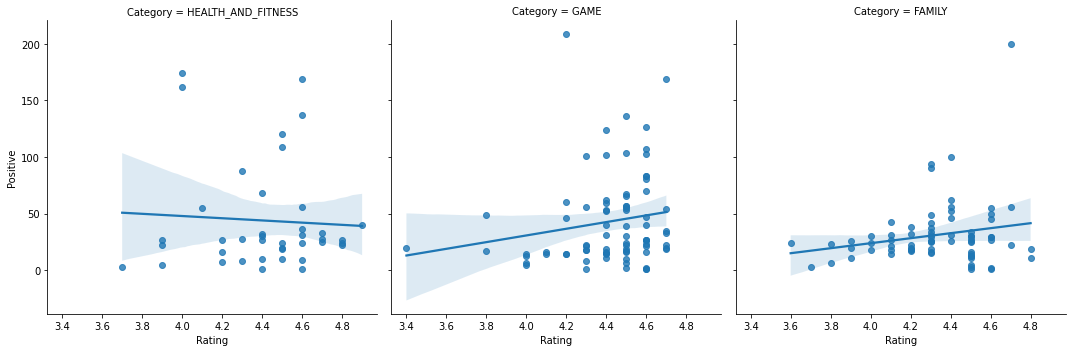

In [191]:
from src.minhas_funcs import plot_lm
plot_lm(data)

Os exemplos acima foram de situações onde temos informações diferentes, em dataframes diferentes, sobre o mesmo assunto. Nessas situações ficou claro que existe a necessidade de uso do ```.merge()```. Porém, também é muito comum temos exatamente as mesmas informações, sobre o mesmo assunto e em dataframes separados, por exemplo, um dataframe com as vendas de cada mês, ou cada ano. Todos os dataframes tem as mesmas colunas, porém cada um representa um mês, dia ou ano diferentes, nessa situação é comum usarmos o ```pd.concat()``` que ira concatenar todos os dataframes.

Na pasta "dados/gasolina/" temos vários arquivos csv que descrevem a venda de gasolina para municipios do Brasil, a fonte desses dados é a ANP. Nessa situação temos 1 arquivo para cada ano entre 2000 e 2018.

In [193]:
pd.read_csv('dados/gasolina/gasolina_2004.csv',sep=';',encoding='latin1').head()

,ANO,ESTADO,CÓDIGO IBGE,Município,Vendas
0,2004,Rondônia,1100015,ALTA FLORESTA D'OESTE,1380000
1,2004,Rondônia,1100023,ARIQUEMES,11807612
2,2004,Rondônia,1100031,CABIXI,460000
3,2004,Rondônia,1100049,CACOAL,8394037
4,2004,Rondônia,1100288,ROLIM DE MOURA,6232200


Podemos verificar se todos os arquivos csv possuem as mesmas colunas.

In [194]:
colunas = pd.read_csv('dados/gasolina/gasolina_2000.csv',sep=';',encoding='latin1').columns

anos_dc = {}

for ano in range(2000,2019):
    temp = pd.read_csv(f'dados/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1').columns
    anos_dc[ano] = temp == colunas

In [195]:
anos_dc

{2000: array([ True,  True,  True,  True,  True]),
 2001: array([ True,  True,  True, False,  True]),
 2002: array([ True,  True,  True, False,  True]),
 2003: array([ True,  True,  True, False,  True]),
 2004: array([ True,  True,  True, False,  True]),
 2005: array([ True,  True,  True, False,  True]),
 2006: array([ True,  True,  True, False,  True]),
 2007: array([ True,  True,  True,  True,  True]),
 2008: array([ True,  True,  True,  True,  True]),
 2009: array([ True,  True,  True,  True,  True]),
 2010: array([ True,  True,  True,  True,  True]),
 2011: array([ True,  True,  True,  True,  True]),
 2012: array([ True,  True,  True,  True,  True]),
 2013: array([ True,  True,  True,  True,  True]),
 2014: array([ True,  True,  True,  True,  True]),
 2015: array([ True,  True,  True,  True,  True]),
 2016: array([ True,  True,  True,  True,  True]),
 2017: array([ True,  True,  True,  True,  True]),
 2018: array([ True,  True, False, False,  True])}

In [197]:
pd.read_csv('dados/gasolina/gasolina_2000.csv',sep=';',encoding='latin1').columns

Index(['ANO', 'ESTADO', 'CÓDIGO IBGE', 'Municípios', 'Vendas'], dtype='object')

In [198]:
pd.read_csv('dados/gasolina/gasolina_2018.csv',sep=';',encoding='latin1').columns

Index(['ANO', 'ESTADO', 'CODIGO IBGE', 'Municipios', 'Vendas'], dtype='object')

In [200]:
dfs_gasolina = []

for ano in tqdm(range(2000,2019)):
    dfs_gasolina.append(pd.read_csv(f'dados/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1'))

100%|███████████████████████████████████████████████████| 19/19 [00:00<00:00, 213.22it/s]


In [201]:
pd.concat(dfs_gasolina)

,ANO,ESTADO,CÓDIGO IBGE,Municípios,Vendas,Município,CODIGO IBGE,Municipios
0,2000.0,Acre,1200013.0,ACRELANDIA,32000,NaN,NaN,NaN
1,2000.0,Acre,1200104.0,BRASILEIA,660000,NaN,NaN,NaN
2,2000.0,Acre,1200138.0,BUJARI,10000,NaN,NaN,NaN
3,2000.0,Acre,1200179.0,CAPIXABA,66000,NaN,NaN,NaN
4,2000.0,Acre,1200203.0,CRUZEIRO DO SUL,4923000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [203]:
## corrigindo o nome das colunas ao ler o dataframe

dfs_gasolina = []

for ano in tqdm(range(2000,2019)):
    temp_df = pd.read_csv(f'dados/gasolina/gasolina_{ano}.csv',sep=';',encoding='latin1',decimal=',')
    temp_df.columns = ['ano','estado','cod_ibge','mun','vendas']
    dfs_gasolina.append(temp_df)
# else:
    gasolina = pd.concat(dfs_gasolina,ignore_index=True).dropna(how='all')

100%|████████████████████████████████████████████████████| 19/19 [00:00<00:00, 47.10it/s]


In [204]:
gasolina

,ano,estado,cod_ibge,mun,vendas
0,2000.0,Acre,1200013.0,ACRELANDIA,32000.0
1,2000.0,Acre,1200104.0,BRASILEIA,660000.0
2,2000.0,Acre,1200138.0,BUJARI,10000.0
3,2000.0,Acre,1200179.0,CAPIXABA,66000.0
4,2000.0,Acre,1200203.0,CRUZEIRO DO SUL,4923000.0
...,...,...,...,...,...
99662,2018.0,Tocantins,1721109.0,TOCANTINIA,447000.0
99663,2018.0,Tocantins,1721208.0,TOCANTINOPOLIS,2783761.0
99664,2018.0,Tocantins,1721257.0,TUPIRAMA,114065.0
99665,2018.0,Tocantins,1722081.0,WANDERLANDIA,1997560.0


Agora temos todos os anos em um dataframe unico e podemos fazer a análise que quisermos.

In [205]:
gasolina.pivot_table(index='estado',columns='ano',values='vendas',aggfunc='sum')

ano,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
estado,,,,,,,,,,,,,,,,,,,
Acre,4.000185e+07,3.889274e+07,4.592857e+07,4.359770e+07,4.717556e+07,4.953164e+07,5.412547e+07,5.998673e+07,6.996194e+07,7.572404e+07,9.498380e+07,1.069488e+08,1.188918e+08,1.253300e+08,1.381518e+08,1.402588e+08,1.368177e+08,1.365926e+08,1.338723e+08
Alagoas,1.645483e+08,1.615238e+08,1.664998e+08,1.601721e+08,1.709946e+08,1.670446e+08,1.688994e+08,1.634904e+08,1.723746e+08,1.794001e+08,2.453278e+08,3.030961e+08,3.638326e+08,4.005180e+08,4.416120e+08,4.258727e+08,4.539623e+08,4.556607e+08,4.177187e+08
Amapa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.580102e+08
Amapá,4.625582e+07,4.520374e+07,5.056215e+07,5.183714e+07,5.710135e+07,5.791122e+07,6.464476e+07,7.234009e+07,8.250963e+07,8.600375e+07,9.939650e+07,1.095156e+08,1.279845e+08,1.378998e+08,1.544174e+08,1.537532e+08,1.515377e+08,1.547283e+08,NaN
Amazonas,2.427424e+08,2.461067e+08,2.657417e+08,2.713196e+08,3.013782e+08,3.028656e+08,3.320615e+08,3.543013e+08,3.885533e+08,4.033120e+08,4.686882e+08,5.213551e+08,5.693967e+08,5.907492e+08,6.273540e+08,6.172034e+08,6.341727e+08,6.444245e+08,6.141793e+08
Bahia,9.270140e+08,8.805268e+08,8.794112e+08,8.857193e+08,9.952923e+08,9.927217e+08,1.006425e+09,9.889118e+08,1.050094e+09,1.056463e+09,1.273406e+09,1.588826e+09,1.842730e+09,1.943731e+09,2.145017e+09,2.050794e+09,2.210593e+09,2.251136e+09,2.010770e+09
Ceara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.329769e+09
Ceará,4.716278e+08,4.586761e+08,4.846761e+08,4.762759e+08,5.032687e+08,5.091748e+08,5.305681e+08,5.525848e+08,6.155397e+08,6.659080e+08,8.201650e+08,9.433280e+08,1.120768e+09,1.216335e+09,1.348677e+09,1.331394e+09,1.372176e+09,1.381639e+09,NaN
Distrito Federal,5.933897e+08,6.087040e+08,6.445570e+08,6.393702e+08,NaN,7.105052e+08,7.360155e+08,7.316903e+08,7.730894e+08,7.616711e+08,8.995669e+08,1.002018e+09,1.079078e+09,1.123062e+09,1.172429e+09,1.122267e+09,1.199589e+09,1.266125e+09,1.090791e+09


Olhando o dataframe acima, percebemos que existem vários nomes de estados escritos de forma não consistente. Vamos normalizar esses nomes.

In [208]:
## biblioteca

import unidecode

ModuleNotFoundError: No module named 'unidecode'

In [370]:
unidecode.unidecode('NáSsÉr').lower()

'nasser'

In [371]:
def normalize_estado(value):
    return unidecode.unidecode(value).lower()

In [372]:
gasolina['estado'] = gasolina.estado.apply(normalize_estado)

In [374]:
plot_df = gasolina.pivot_table(index='estado',columns='ano',values='vendas',aggfunc='sum')
plot_df

ano,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0
estado,,,,,,,,,,,,,,,,,,,
acre,4.000185e+07,3.889274e+07,4.592857e+07,4.359770e+07,4.717556e+07,4.953164e+07,5.412547e+07,5.998673e+07,6.996194e+07,7.572404e+07,9.498380e+07,1.069488e+08,1.188918e+08,1.253300e+08,1.381518e+08,1.402588e+08,1.368177e+08,1.365926e+08,1.338723e+08
alagoas,1.645483e+08,1.615238e+08,1.664998e+08,1.601721e+08,1.709946e+08,1.670446e+08,1.688994e+08,1.634904e+08,1.723746e+08,1.794001e+08,2.453278e+08,3.030961e+08,3.638326e+08,4.005180e+08,4.416120e+08,4.258727e+08,4.539623e+08,4.556607e+08,4.177187e+08
amapa,4.625582e+07,4.520374e+07,5.056215e+07,5.183714e+07,5.710135e+07,5.791122e+07,6.464476e+07,7.234009e+07,8.250963e+07,8.600375e+07,9.939650e+07,1.095156e+08,1.279845e+08,1.378998e+08,1.544174e+08,1.537532e+08,1.515377e+08,1.547283e+08,1.580102e+08
amazonas,2.427424e+08,2.461067e+08,2.657417e+08,2.713196e+08,3.013782e+08,3.028656e+08,3.320615e+08,3.543013e+08,3.885533e+08,4.033120e+08,4.686882e+08,5.213551e+08,5.693967e+08,5.907492e+08,6.273540e+08,6.172034e+08,6.341727e+08,6.444245e+08,6.141793e+08
bahia,9.270140e+08,8.805268e+08,8.794112e+08,8.857193e+08,9.952923e+08,9.927217e+08,1.006425e+09,9.889118e+08,1.050094e+09,1.056463e+09,1.273406e+09,1.588826e+09,1.842730e+09,1.943731e+09,2.145017e+09,2.050794e+09,2.210593e+09,2.251136e+09,2.010770e+09
ceara,4.716278e+08,4.586761e+08,4.846761e+08,4.762759e+08,5.032687e+08,5.091748e+08,5.305681e+08,5.525848e+08,6.155397e+08,6.659080e+08,8.201650e+08,9.433280e+08,1.120768e+09,1.216335e+09,1.348677e+09,1.331394e+09,1.372176e+09,1.381639e+09,1.329769e+09
distrito federal,5.933897e+08,6.087040e+08,6.445570e+08,6.393702e+08,NaN,7.105052e+08,7.360155e+08,7.316903e+08,7.730894e+08,7.616711e+08,8.995669e+08,1.002018e+09,1.079078e+09,1.123062e+09,1.172429e+09,1.122267e+09,1.199589e+09,1.266125e+09,1.090791e+09
espirito santo,4.973384e+08,4.387184e+08,4.572056e+08,4.477168e+08,4.224158e+08,4.311781e+08,4.616451e+08,4.749838e+08,4.852918e+08,5.111980e+08,6.382236e+08,7.157526e+08,8.217775e+08,8.617185e+08,9.349336e+08,9.170212e+08,9.471490e+08,9.375604e+08,9.096451e+08
goias,7.280019e+08,7.198322e+08,7.928515e+08,7.756506e+08,8.804384e+08,8.790543e+08,8.896108e+08,8.804350e+08,9.219287e+08,9.512480e+08,1.083507e+09,1.256557e+09,1.446209e+09,1.529630e+09,1.639889e+09,1.469880e+09,1.531089e+09,1.559199e+09,1.223071e+09


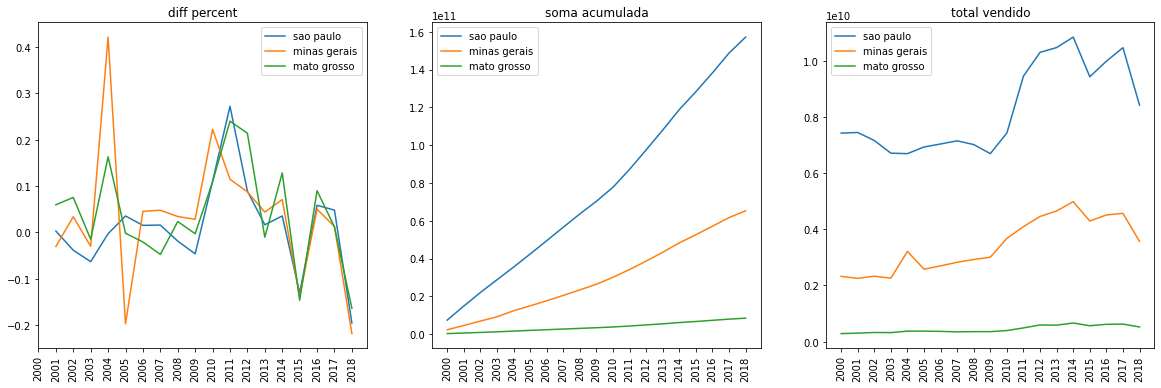

In [378]:
import matplotlib.pyplot as plt
import seaborn as sns
ls_estados = ['sao paulo','minas gerais','mato grosso']

f, ax = plt.subplots(1,3,figsize=(20,6))

for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado].pct_change(),label=f'{estado}',ax=ax[0])

for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado].cumsum(),label=f'{estado}',ax=ax[1])
    
for estado in ls_estados:
    sns.lineplot(x=range(2000,2019),y=plot_df.loc[estado],label=f'{estado}',ax=ax[2])
    
titles = ['diff percent','soma acumulada','total vendido']
    
for i in range(3):
    ax[i].set_title(titles[i])
    ax[i].set_xticks(range(2000,2019))
    ax[i].set_xticklabels(labels=range(2000,2019),rotation=90)
    ax[i].set_ylabel('')
    ax[i].legend(loc='best')

# Valores Nulos
___

Ao se trabalhar com dados, estamos sujeitos a encontrar valores nulos. Valores nulos podem ocorrer por diversas razões, as mais comuns são a falta da coleta do dado ou algum erro no nosso código. Precisamos entender como encontrar, imputar ou dropar valores nulos. Para isso vamos aprender algumas funções ```.isna()```, ```.notna()```, ```.dropna()``` e ```.fillna()```

O primeiro trabalho é encontrar valores nulos.

In [ ]:
df = pd.read_csv('data/carros.csv')

for i in np.random.randint(0,df.shape[0],size=300):
    df.iloc[i,2] = np.nan

for i in np.random.randint(0,df.shape[0],size=300):
    df.iloc[i,3] = np.nan

for i in np.random.randint(0,df.shape[0],size=50):
    df.iloc[i,:] = np.nan
    
df.head()

In [ ]:
df.shape

A primeira forma de encontrar valores nulos é através do .info()

In [ ]:
df.info()

Podemos ver que a coluna 'Price' e a coluna 'transmission' possuem valores nulos. Mas também vemos que possuímos linhas que são completamente nulas. Outra forma, mais simples é utilizar o ```.isna()```

In [ ]:
## procurando valores nulos
df.isna()

In [ ]:
## somando valores nulos

df.isna().sum()

Agora podemos saber quantos valores nulos temos em cada coluna. Podemos também utilizar o ```.notna()``` para encontrar o contrário.

In [ ]:
df.notna().sum()

Ao encontrar valores nulos devemos tomar uma decisão. Iremos substituir os valores nulos por novos (imputação) ou vamos jogá-los fora (drop). Em ambos os casos devemos analisar os dados nulos.

In [ ]:
## descobrindo porcentagem

(df.isna().sum() / df.shape[0])*100

In [ ]:
df[df.price.isna()]

Vamos tratar primeiro as colunas que são inteiramente nulas, essas colunas não entregam nenhuma informação e são lixo no nosso dataset. Para isso vamos utilizar o ```.dropna()```

In [ ]:
df.dropna(how='all',inplace=True)

![](imgs/inplace.png)

In [ ]:
df.isna().sum()

Veja que dropamos somente as linhas que tinham todas as colunas nulas.

In [ ]:
df[df.price.isna()]

Como a coluna price é bem importante, podemos fazer um trabalho de imputação utilizando a média. Para isso vamos descobrir a média e depois utilizar o ```.fillna()```

In [ ]:
media = df.price.mean()

df.price.fillna(media,inplace=True)

In [ ]:
df.isna().sum()

In [ ]:
df.loc[[34,100,253],:]

Temos agora a coluna transmission que também possui valores nulos, mas por ser uma variável categórico o mais correto seria utilizarmos uma imputação pela moda (visto que é impossível tirar a média de valores categóricos).

In [ ]:
moda = df.transmission.mode().values[0]

df.transmission.fillna(moda,inplace=True)

In [ ]:
df.isna().sum()

# Method Chaining
___

O encadeamento de métodos é um método de escrever código em pandas que todo cientista de dados DEVE saber. Ele consiste em escrever vários métodos seguidos um do outro e que retornem um objeto que o próximo objeto pode receber.

In [ ]:
ls_categorias = ['ART_AND_DESIGN','FAMILY','BOOKS_AND_REFERENCE']

df = pd.read_csv('data/googleplaystore.csv')
     
(
    df
    ## selecionando os dados que preciso
    .loc[df.Category.isin(ls_categorias),['Category','Reviews','Rating','App']]
    ## sobrescrevendo a coluna Reviews
    .assign(Reviews = lambda x: x.Reviews.astype(float))
    ## dropando os valores duplicados
    .drop_duplicates(subset=['App'],keep='last')
    ## dropando os valores nulos
    .dropna(subset=['Reviews','Rating'])
    ## agregando por categoria
    .groupby('Category')
    ## definindo funções de agregação
    .agg({'Reviews':sum,'Rating':np.mean})
    ## organizando os valores
    .sort_values('Rating',ascending=False)
    ## escolhendo só a coluna reviews
    .Reviews
    ## plotando
    .plot(kind='bar')
)

Basicamente toda função pode fazer parte de um encadeamento de métodos, porém aquelas que retornam uma série ou um dataframe são melhores. Veja que em nenhum dos métodos utilizamos o inplace=True, pois queremos que o método gere uma saída que será usada como entrada do próximo método.

# Bônus
___

Essas são funções que você deve conhecer e que vão te ajudar no dia a dia.

[.diff](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.diff.html) - Diferença entre valores dentro um a série ou dataframe (o valor de baixo menos o de cima)

[.rolling](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html) - Criar janelas, associado a um função pode ser poderoso .rolling(7).mean() == média móvel de 7 dias.

[.rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html) - Renomear colunas, muito usado com method_chaining.

[.lt e família](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.lt.html) - Operadores lógicos que podem ser aplicado utilizando comparação dataframe com dataframe.